In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [9]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


<AxesSubplot:>

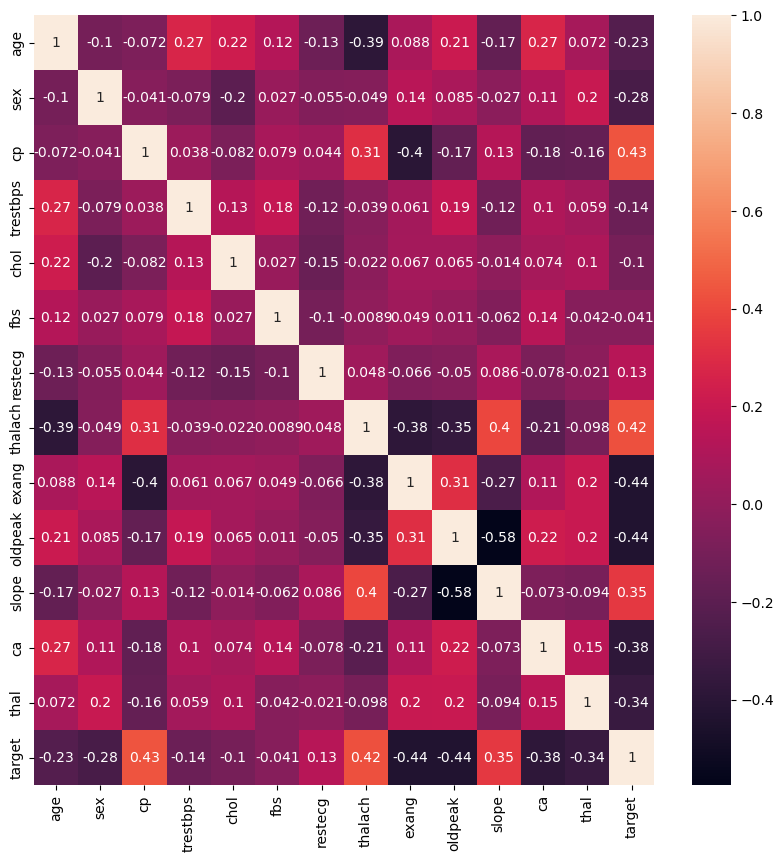

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [11]:
data.duplicated().sum()

723

In [12]:
data.shape

(1025, 14)

In [13]:
data.drop_duplicates(inplace=True)

In [14]:
data.shape

(302, 14)

In [15]:
data['target'].value_counts()       #to see if data balanced or not 

1    164
0    138
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

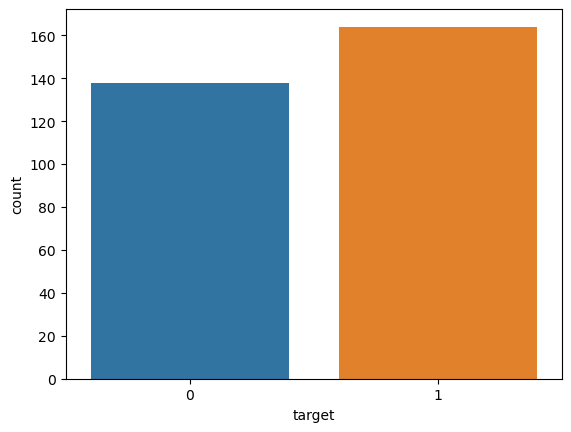

In [16]:
sns.countplot(x='target',data=data)

In [17]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.1)

In [21]:
from sklearn.preprocessing import StandardScaler
SD=StandardScaler()
x_train=SD.fit_transform(x_train)
x_test=SD.transform(x_test)

In [22]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()    
model.fit(x_train,y_train)
y_pred=model.predict (x_test)

In [31]:
#evaluate 
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[15  1]
 [ 2 13]]


In [34]:
from sklearn.metrics import recall_score , precision_score , accuracy_score, f1_score 
print('Accuracy: ',accuracy_score(y_test,y_pred) )
print('Recall: ',recall_score(y_test,y_pred) )
print('Precision: ',precision_score(y_test,y_pred) )
print('F1_score: ',f1_score(y_test,y_pred) )

Accuracy:  0.9032258064516129
Recall:  0.9285714285714286
Precision:  0.8666666666666667
F1_score:  0.896551724137931


# New Data

In [352]:
data=pd.read_csv('BRCA.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341 entries, 0 to 340
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    float64
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [353]:
data.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36.0,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43.0,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69.0,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56.0,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56.0,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead


In [354]:
data.duplicated().sum()

6

In [355]:
data.drop_duplicates(inplace=True)

In [356]:
data.drop('Patient_ID',axis=1,inplace=True)

In [357]:
data.isna().sum()

Age                    1
Gender                 1
Protein1               1
Protein2               1
Protein3               1
Protein4               1
Tumour_Stage           1
Histology              1
ER status              1
PR status              1
HER2 status            1
Surgery_type           1
Date_of_Surgery        1
Date_of_Last_Visit    18
Patient_Status        14
dtype: int64

In [358]:
data[data['Age'].isna()]

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [359]:
null_row=data[data['Age'].isna()].index.to_list()
data.drop(null_row,axis=0,inplace=True)

In [360]:
data.isna().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [361]:
data['Gender'].value_counts()

FEMALE    330
MALE        4
Name: Gender, dtype: int64

In [362]:
for i in range(len(data)):
    if data.loc[i,'Gender']=='FEMALE':
        data.loc[i,'Gender']=0
    elif data.loc[i,'Gender']=='MALE':
        data.loc[i,'Gender']=1
data['Gender']=pd.to_numeric(data['Gender'])

In [363]:
data['Tumour_Stage'].value_counts()

II     189
III     81
I       64
Name: Tumour_Stage, dtype: int64

In [364]:
for i in range(len(data)):
    if data.loc[i,'Tumour_Stage']=='II':
        data.loc[i,'Tumour_Stage']=2
    elif data.loc[i,'Tumour_Stage']=='III':
        data.loc[i,'Tumour_Stage']=3
    elif data.loc[i,'Tumour_Stage']=='I':
        data.loc[i,'Tumour_Stage']=1
data['Tumour_Stage']=pd.to_numeric(data['Tumour_Stage'])

In [365]:
data['HER2 status'].value_counts()

Negative    305
Positive     29
Name: HER2 status, dtype: int64

In [366]:
for i in range(len(data)):
    if data.loc[i,'HER2 status']=='Negative':
        data.loc[i,'HER2 status']=data.loc[i,'HER2 status'].replace('Negative','0')
    elif data.loc[i,'HER2 status']=='Positive':
        data.loc[i,'HER2 status']=data.loc[i,'HER2 status'].replace('Positive','1')
data['HER2 status']=data['HER2 status'].astype('int')    

In [367]:
data.isna().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [368]:
nulls=data[data['Date_of_Last_Visit'].isna()].index.to_list()
for i in nulls:
    data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Surgery']

In [369]:
data['Date_of_Surgery'].value_counts()

06-Nov-18    5
16-Nov-18    5
26-Nov-18    5
06-Dec-18    5
27-Oct-18    4
            ..
02-Oct-17    1
22-Sep-17    1
12-Sep-17    1
02-Sep-17    1
21-Nov-19    1
Name: Date_of_Surgery, Length: 181, dtype: int64

In [370]:
data['Date_of_Surgery']=data['Date_of_Surgery'].astype('str')
for i in range(len(data)):
    if 'Jan' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Jan','1')
    if 'Feb' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Feb','2')
    if 'Mar' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Mar','3')
    if 'Apr' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Apr','4')
    if 'May' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('May','5')
    if 'Jun' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Jun','6')
    if 'Jul' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Jul','7')
    if 'Sep' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Sep','9')
    if 'Aug' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Aug','8')
    if 'Oct' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Oct','10')
    if 'Nov' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Nov','11')
    if 'Dec' in data.loc[i,'Date_of_Surgery']:
        data.loc[i,'Date_of_Surgery']=data.loc[i,'Date_of_Surgery'].replace('Dec','12')

In [371]:
m=np.empty((len(data),3))

for i in range(len(data)):   
    m[i]= data.loc[i,'Date_of_Surgery'].split('-')
    data.loc[i,'Date_of_Surgery_Day']=m[i][0]
    data.loc[i,'Date_of_Surgery_Month']=m[i][1]
    data.loc[i,'Date_of_Surgery_year']=m[i][2]
    

In [372]:
data.drop('Date_of_Surgery',axis=1,inplace=True)

In [373]:
data['Date_of_Last_Visit']=data['Date_of_Last_Visit'].astype('str')
for i in range(len(data)):
    if 'Jan' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Jan','1')
    if 'Feb' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Feb','2')
    if 'Mar' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Mar','3')
    if 'Apr' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Apr','4')
    if 'May' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('May','5')
    if 'Jun' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Jun','6')
    if 'Jul' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Jul','7')
    if 'Sep' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Sep','9')
    if 'Aug' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Aug','8')
    if 'Oct' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Oct','10')
    if 'Nov' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Nov','11')
    if 'Dec' in data.loc[i,'Date_of_Last_Visit']:
        data.loc[i,'Date_of_Last_Visit']=data.loc[i,'Date_of_Last_Visit'].replace('Dec','12')


In [374]:
m=np.empty((len(data),3))

for i in range(len(data)):
    if data.loc[i,'Date_of_Last_Visit']!=np.nan:        
        m[i]= data.loc[i,'Date_of_Last_Visit'].split('-')
        data.loc[i,'Date_of_Last_Visit_Day']=m[i][0]
        data.loc[i,'Date_of_Last_Visit_Month']=m[i][1]
        data.loc[i,'Date_of_Last_Visit_year']=m[i][2]

In [375]:
data.drop('Date_of_Last_Visit',axis=1,inplace=True)

In [376]:
data['ER status'].value_counts()

Positive    334
Name: ER status, dtype: int64

In [377]:
data['PR status'].value_counts()

Positive    334
Name: PR status, dtype: int64

In [378]:
data.drop(['ER status','PR status'],axis=1,inplace=True)

In [379]:
data.head(1)

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Patient_Status,Date_of_Surgery_Day,Date_of_Surgery_Month,Date_of_Surgery_year,Date_of_Last_Visit_Day,Date_of_Last_Visit_Month,Date_of_Last_Visit_year
0,36.0,0,0.080353,0.42638,0.54715,0.27368,3,Infiltrating Ductal Carcinoma,0,Modified Radical Mastectomy,Alive,15.0,1.0,17.0,19.0,6.0,17.0


In [380]:
from sklearn.preprocessing import LabelEncoder 
le=LabelEncoder()
data['Histology']=le.fit_transform(data['Histology'])
data['Surgery_type']=le.fit_transform(data['Surgery_type'])


In [381]:
data['Patient_Status'].value_counts()

Alive    255
Dead      66
Name: Patient_Status, dtype: int64

In [382]:
for i in range(len(data)):
    if data.loc[i,'Patient_Status']=='Alive':
        data.loc[i,'Patient_Status']=0
    elif data.loc[i,'Patient_Status']=='Dead':
        data.loc[i,'Patient_Status']=1

In [383]:
nulls=data[data['Patient_Status'].isna()].index.to_list()
nulls

[7, 22, 99, 111, 182, 196, 206, 219, 221, 285, 286, 305, 321]

In [384]:
for i in nulls:
    data.drop(i,axis=0,inplace=True)

In [394]:
data['Patient_Status']=data['Patient_Status'].astype('int')  
data['Date_of_Surgery_Day']=data['Date_of_Surgery_Day'].astype('int')    
data['Date_of_Surgery_Month']=data['Date_of_Surgery_Month'].astype('int')    
data['Date_of_Surgery_year']=data['Date_of_Surgery_year'].astype('int')    
data['Date_of_Last_Visit_Day']=data['Date_of_Last_Visit_Day'].astype('int')    
data['Date_of_Last_Visit_Month']=data['Date_of_Last_Visit_Month'].astype('int')    
data['Date_of_Last_Visit_year']=data['Date_of_Last_Visit_year'].astype('int')    

In [395]:
data.isna().sum()

Age                         0
Gender                      0
Protein1                    0
Protein2                    0
Protein3                    0
Protein4                    0
Tumour_Stage                0
Histology                   0
HER2 status                 0
Surgery_type                0
Date_of_Surgery_Day         0
Date_of_Surgery_Month       0
Date_of_Surgery_year        0
Date_of_Last_Visit_Day      0
Date_of_Last_Visit_Month    0
Date_of_Last_Visit_year     0
Patient_Status              0
dtype: int64

In [387]:
Target=data['Patient_Status']

In [388]:
data.drop('Patient_Status',axis=1,inplace=True)

In [389]:
data['Patient_Status']=Target

In [396]:
data.head()

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,HER2 status,Surgery_type,Date_of_Surgery_Day,Date_of_Surgery_Month,Date_of_Surgery_year,Date_of_Last_Visit_Day,Date_of_Last_Visit_Month,Date_of_Last_Visit_year,Patient_Status
0,36.0,0,0.080353,0.42638,0.54715,0.273680,3,0,0,1,15,1,17,19,6,17,0
1,43.0,0,-0.420320,0.57807,0.61447,-0.031505,2,2,0,0,26,4,17,9,11,18,1
2,69.0,0,0.213980,1.31140,-0.32747,-0.234260,3,0,0,2,8,9,17,9,6,18,0
3,56.0,0,0.345090,-0.21147,-0.19304,0.124270,2,0,0,1,25,1,17,12,7,17,0
4,56.0,0,0.221550,1.90680,0.52045,-0.311990,2,0,0,2,6,5,17,27,6,19,1


In [397]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 321 entries, 0 to 333
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       321 non-null    float64
 1   Gender                    321 non-null    int64  
 2   Protein1                  321 non-null    float64
 3   Protein2                  321 non-null    float64
 4   Protein3                  321 non-null    float64
 5   Protein4                  321 non-null    float64
 6   Tumour_Stage              321 non-null    int64  
 7   Histology                 321 non-null    int32  
 8   HER2 status               321 non-null    int32  
 9   Surgery_type              321 non-null    int32  
 10  Date_of_Surgery_Day       321 non-null    int32  
 11  Date_of_Surgery_Month     321 non-null    int32  
 12  Date_of_Surgery_year      321 non-null    int32  
 13  Date_of_Last_Visit_Day    321 non-null    int32  
 14  Date_of_La

<AxesSubplot:>

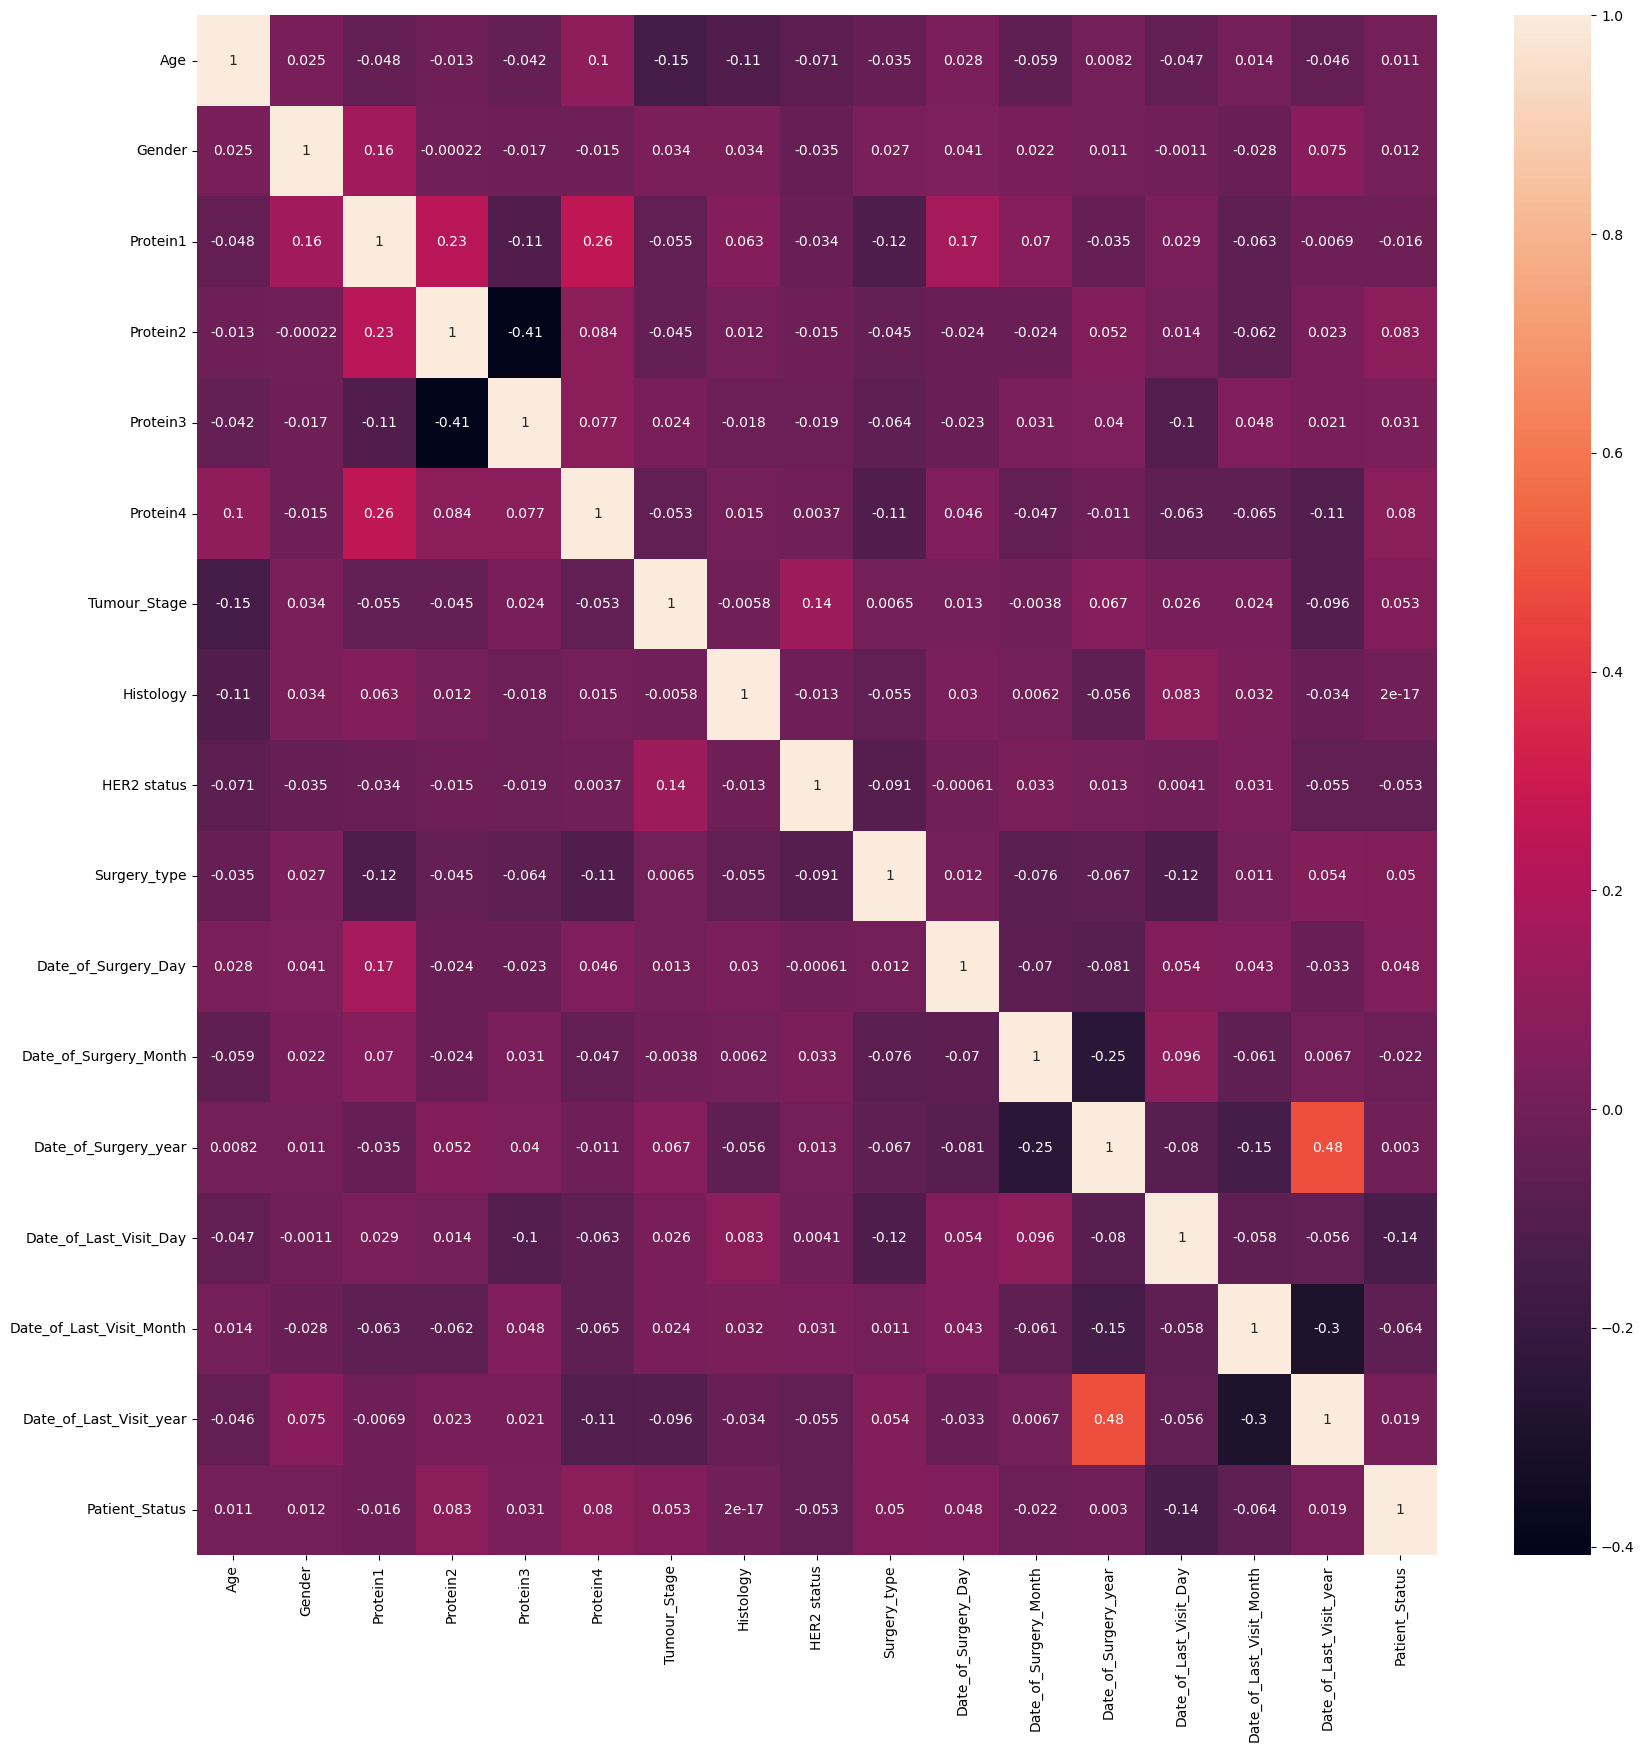

In [398]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

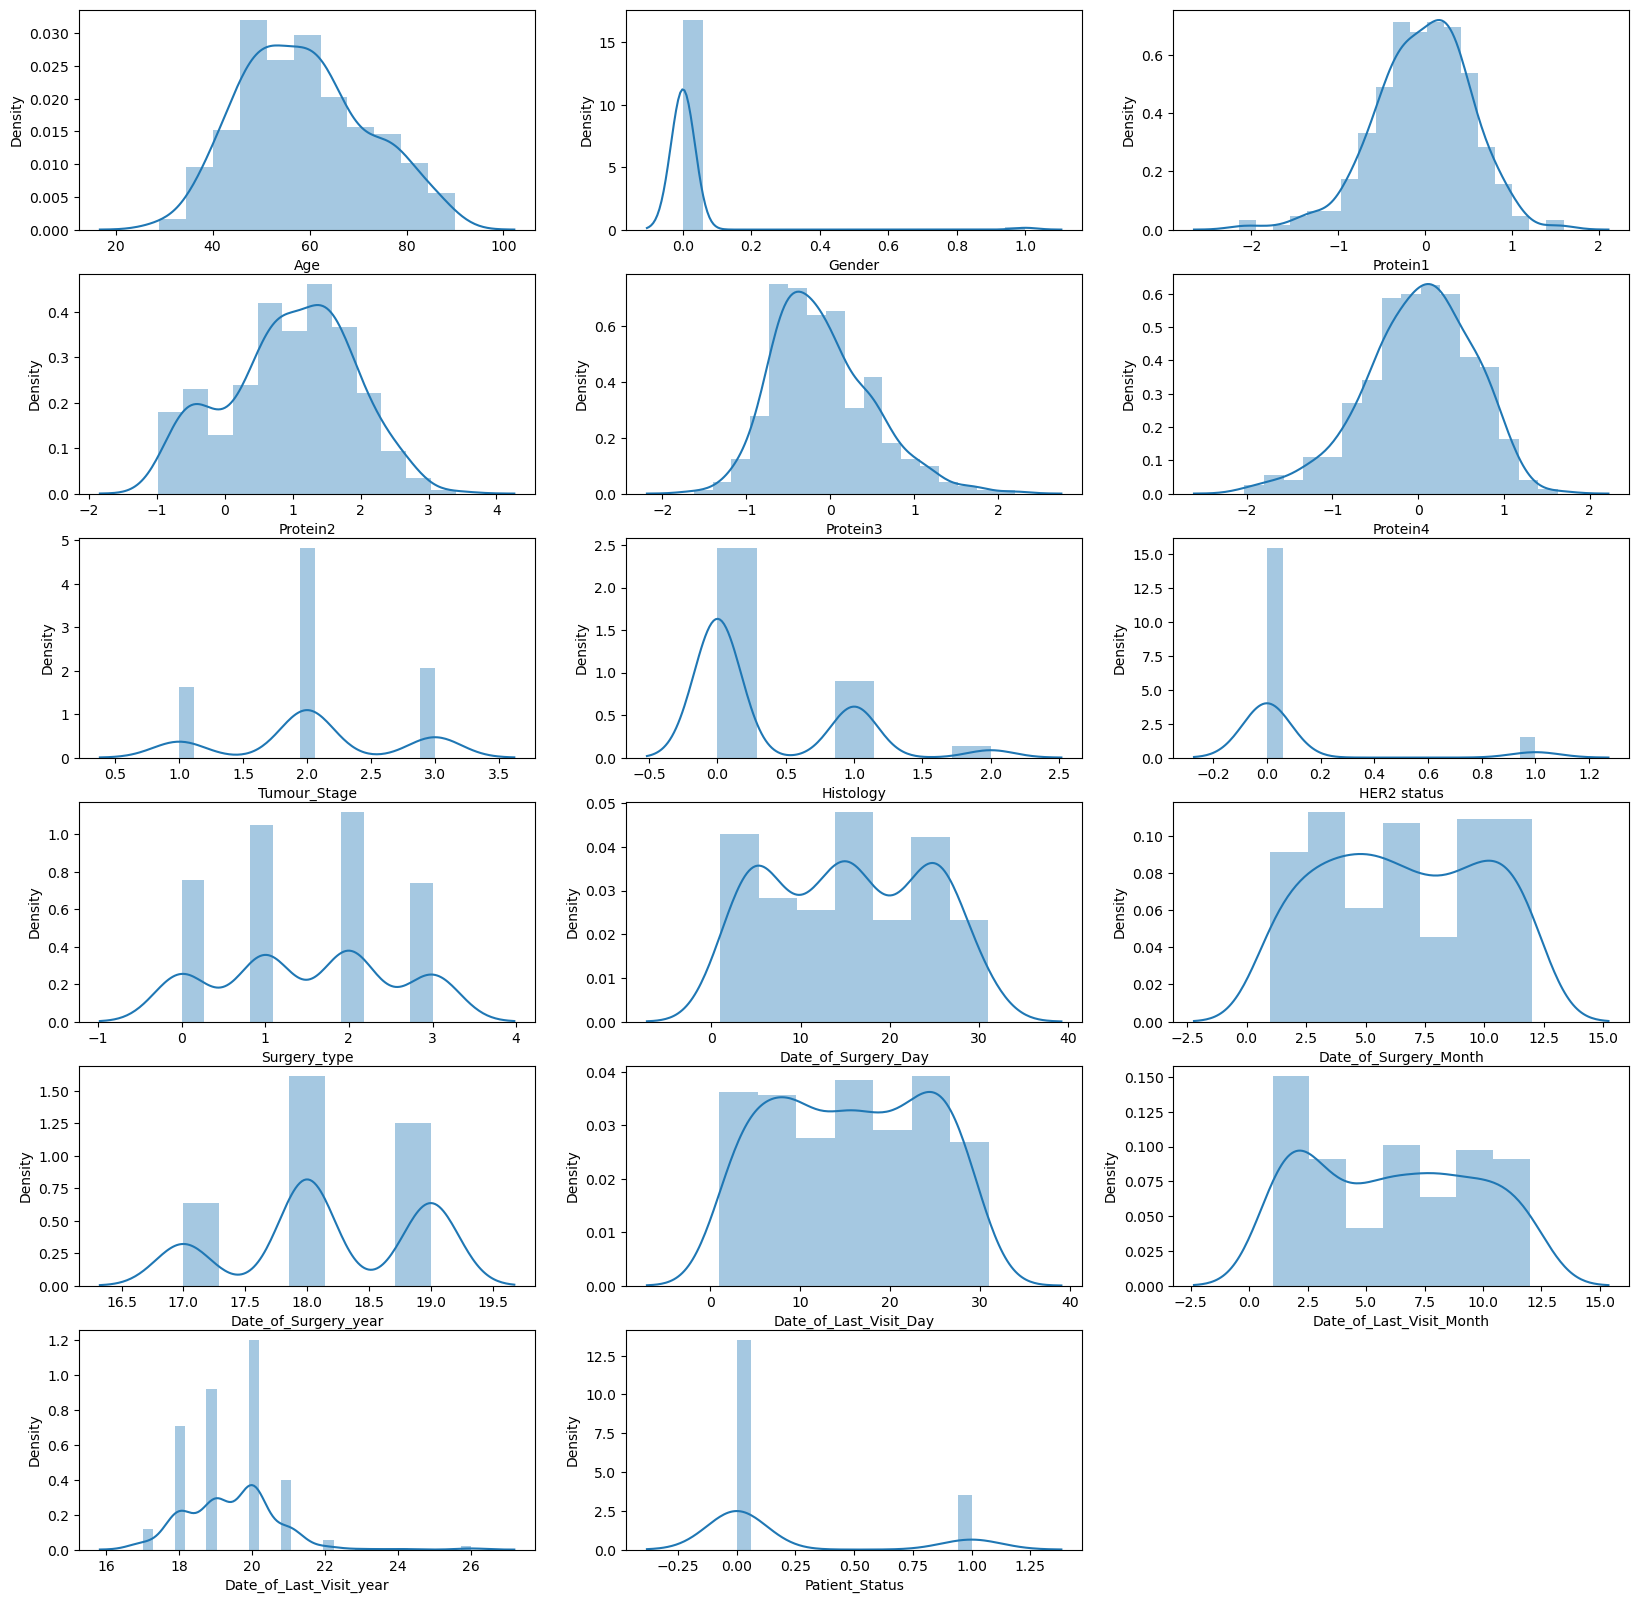

In [399]:
plt.figure(figsize=(20,20))
i=1
for col in data.columns:
    plt.subplot(6,3,i)
    sns.distplot(data[col])
    i+=1
plt.show()